In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_adult = pd.read_csv('adult.data', delimiter=',') 

In [3]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss',
                             'hours-per-week','native-country','income']  
df_adult.columns = column_headers

<font size="5">Check the first few rows of the dataset using the head() or sample() function to get an overview of the data. Examine the columns and their data types using info(). Check for missing values using isnull() or info(). Investigate basic summary statistics with describe().

In [5]:
df_adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [131]:
df_adult.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
12300,48,Private,265295,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [132]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [133]:
df_adult.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<font size="5">Handle missing values by either removing rows or filling them with appropriate values (mean, median, mode, etc.). Correct data types if needed. Address any outliers or anomalies. 

In [134]:
df_adult['occupation'].unique().tolist()

[' Exec-managerial',
 ' Handlers-cleaners',
 ' Prof-specialty',
 ' Other-service',
 ' Adm-clerical',
 ' Sales',
 ' Craft-repair',
 ' Transport-moving',
 ' Farming-fishing',
 ' Machine-op-inspct',
 ' Tech-support',
 ' ?',
 ' Protective-serv',
 ' Armed-Forces',
 ' Priv-house-serv']

In [135]:
df_adult.replace(' ?', np.nan, inplace=True)

In [136]:
missingvalues = df_adult.isna().sum().sort_values(ascending= False)
missingvalues

occupation        1843
workclass         1836
native-country     583
age                  0
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64

In [137]:
common_Occ = df_adult['occupation'].mode()[0]  
common_wc= df_adult['workclass'].mode()[0]  
common_native= df_adult['native-country'].mode()[0]  

In [138]:
df_adult['occupation'].fillna(common_Occ, inplace=True)
df_adult['workclass'].fillna(common_wc, inplace=True)
df_adult['native-country'].fillna(common_native, inplace=True)

In [139]:
df_adult = df_adult.applymap(lambda x: x.lstrip() if isinstance(x, str) else x)

In [119]:
df_adult['occupation'].unique().tolist()

['Exec-managerial',
 'Handlers-cleaners',
 'Prof-specialty',
 'Other-service',
 'Adm-clerical',
 'Sales',
 'Craft-repair',
 'Transport-moving',
 'Farming-fishing',
 'Machine-op-inspct',
 'Tech-support',
 'Protective-serv',
 'Armed-Forces',
 'Priv-house-serv']

In [140]:
def fill_income(row):
    if row['income'] == '<=50K':
        return np.random.randint(10000, 50001)
    else:
        return np.random.randint(50000, 100001)

df_adult['income_filled'] = df_adult.apply(fill_income, axis=1)
df_adult.drop(columns=['income'], inplace=True)

df_adult.rename(columns={'income_filled': 'income'}, inplace=True)


In [141]:
df_adult.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,33437
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,31313
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,45962


<font size ="5">Univariate Analysis:Visualize the distribution of each numerical feature using histograms, box plots, or density plots. Explore categorical features using bar charts to see the frequency of each category

In [142]:
df_adult.to_excel("Adult_Data.xlsx",sheet_name = "Adult_Data",index=False)

In [143]:
df_adult1 =pd.read_excel("Adult_Data.xlsx") 

In [144]:
df_adult1.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,33437
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,31313
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,45962


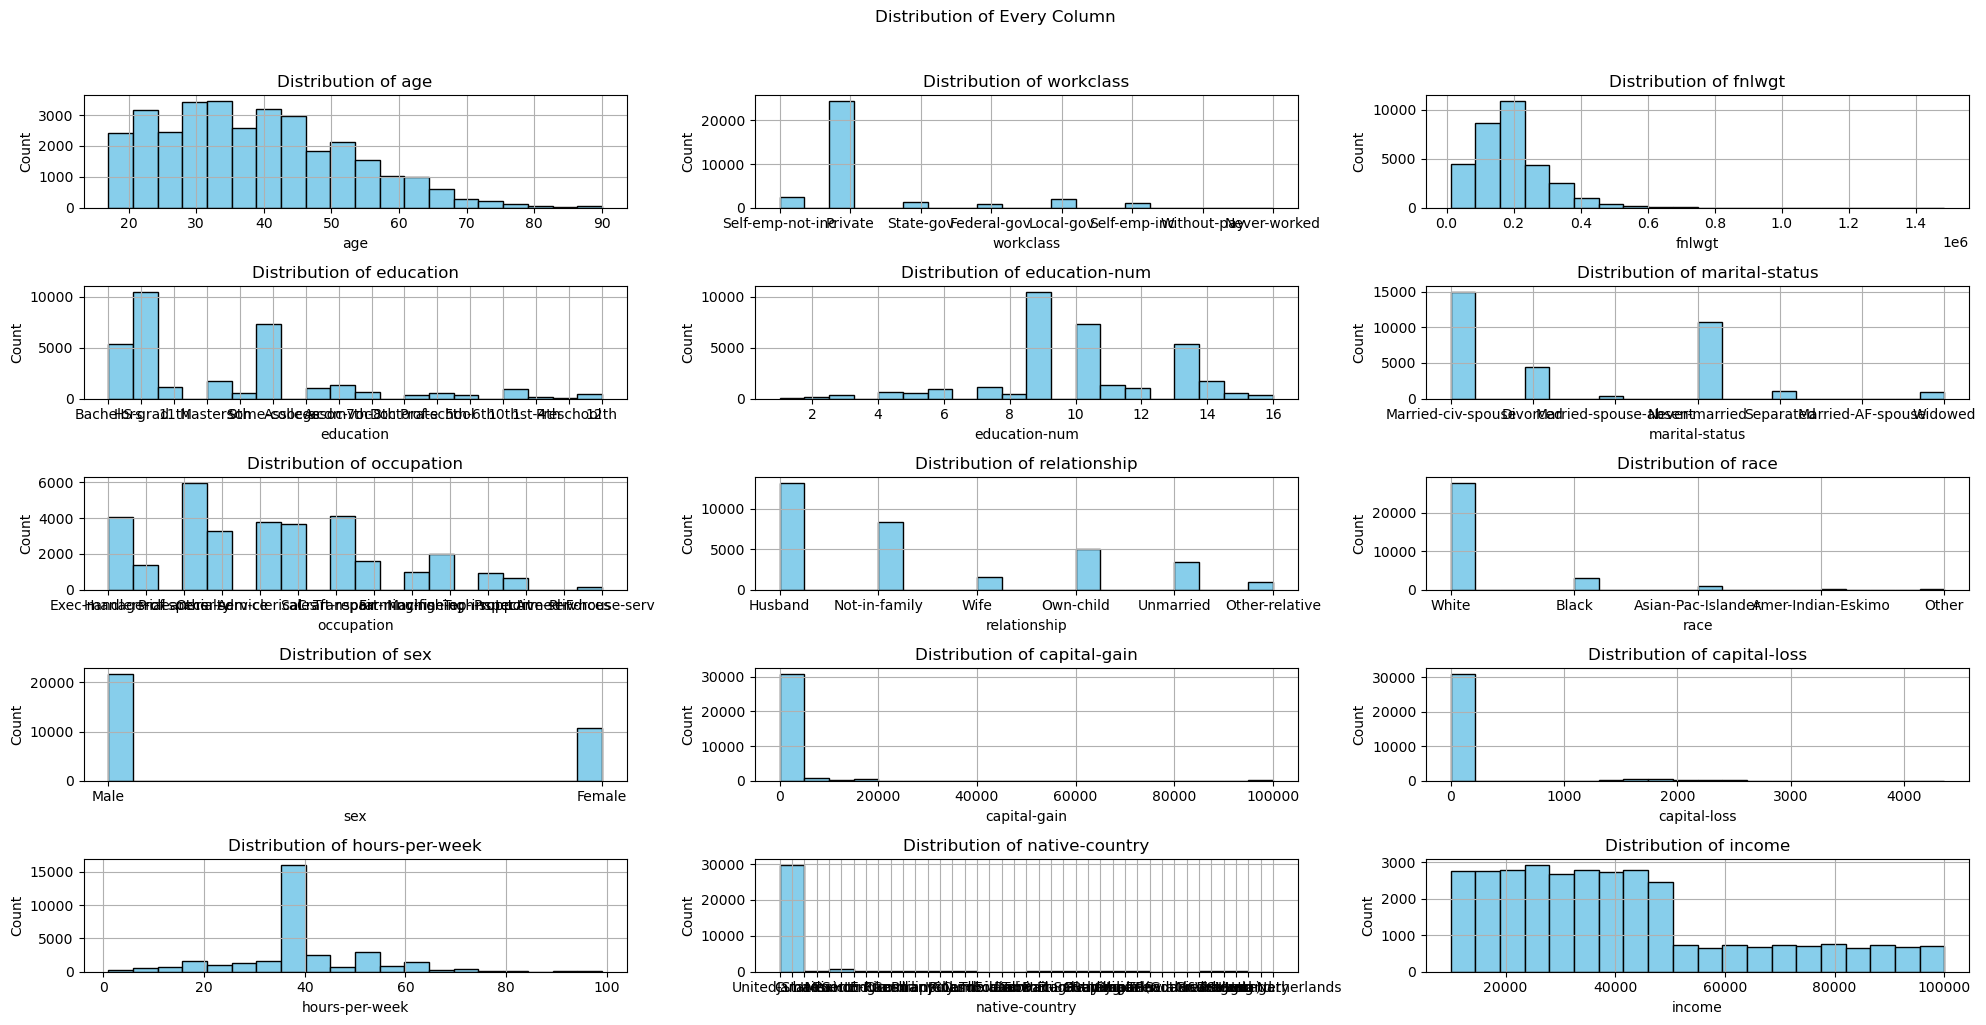

In [145]:
num_columns = len(df_adult1.columns)

num_rows = (num_columns + 1) //3
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 2 * num_rows))
fig.suptitle("Distribution of Every Column", y=1.02)

axes = axes.flatten()

for i, column in enumerate(df_adult1.columns):
    ax = axes[i]
    df_adult1[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

if num_columns % 3 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

<font size="5">Bivariate Analysis:
Explore relationships between pairs of variables. Use scatter plots for numerical features and box plots or bar charts for categorical features against the target variable. Calculate correlations (e.g., Pearson correlation) to measure the strength and direction of relationships between numerical variables.

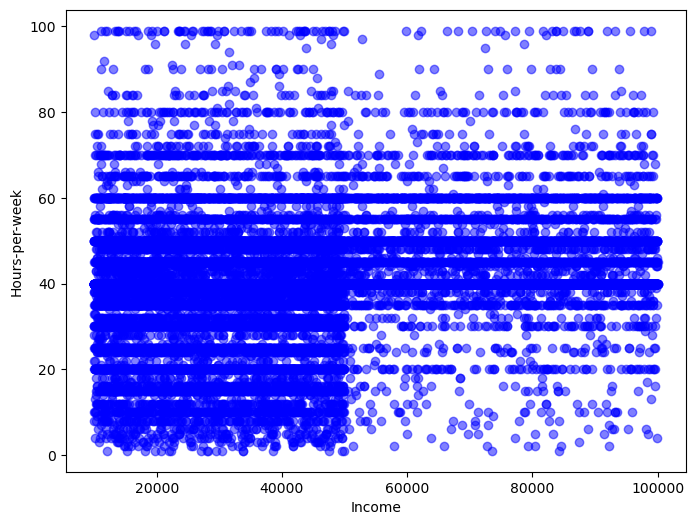

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(df_adult1['income'],df_adult1['hours-per-week'], alpha=0.5, color='blue')
plt.ylabel('Hours-per-week')
plt.xlabel('Income')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
import category_encoders as ce

In [48]:
X = df_adult1.drop(['occupation'], axis=1)

y = df_adult1['occupation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [49]:
X_train.shape, X_test.shape

((21815, 14), (10745, 14))

In [51]:
encoder = ce.OrdinalEncoder(cols=['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex','native-country'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
X_train.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16068,44,1,124924,1,9,1,1,1,1,0,0,40,1,30555
27584,51,1,123429,2,14,1,1,1,1,0,0,50,2,53975
18010,44,2,387770,3,10,2,2,1,2,0,0,15,2,20398


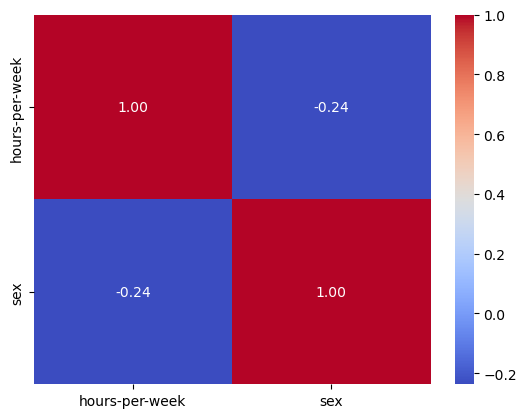

In [148]:
sns.heatmap(X_train[['hours-per-week', 'sex']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

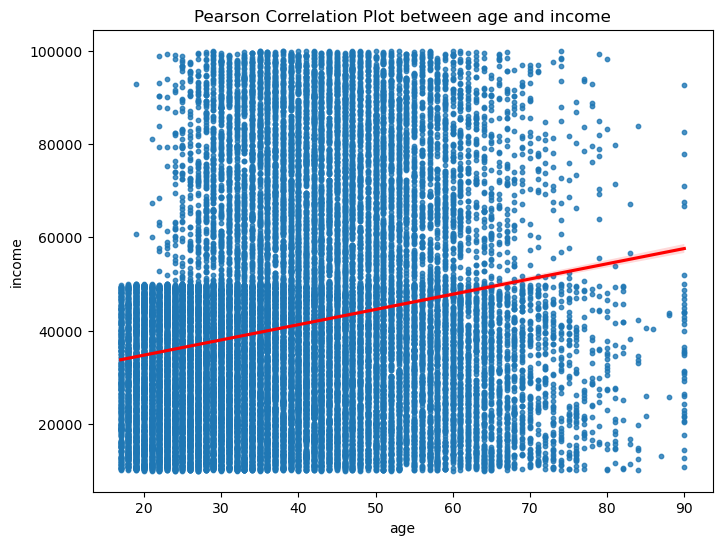

In [62]:
column1='age'
column2='income'

plt.figure(figsize=(8, 6))
sns.regplot(x=column1, y=column2, data=X, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Pearson Correlation Plot between {column1} and {column2}')
plt.xlabel(column1)
plt.ylabel(column2)
plt.show()

<font size="5">Multivariate Analysis:
Consider interactions between three or more variables. Use techniques like heatmaps or pair plots to visualize relationships in multivariate space. 

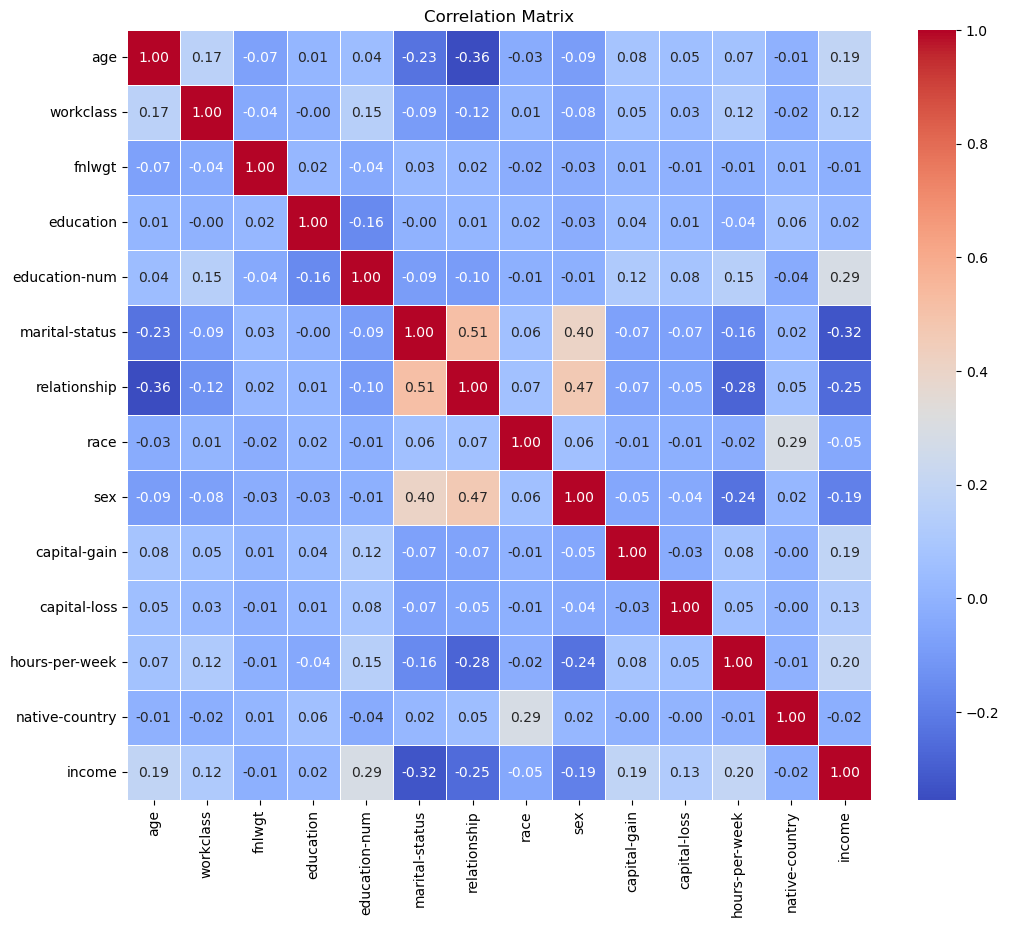

In [65]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<font size="5">Feature Engineering:
Create new features if necessary. Encode categorical variables (e.g., one-hot encoding). Transform features (e.g., log-transform for skewed distributions).

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
y_pred_gini = clf_gini.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3043


[Text(0.5, 0.875, 'x[4] <= 12.5\ngini = 0.889\nsamples = 21815\nvalue = [2521, 7, 2732, 2767, 682, 905, 1375, 2179, 98, 3973\n417, 2466, 626, 1067]'),
 Text(0.25, 0.625, 'x[8] <= 1.5\ngini = 0.897\nsamples = 16511\nvalue = [2133, 6, 2568, 1422, 623, 867, 1312, 2044, 92, 1791\n350, 1838, 445, 1020]'),
 Text(0.125, 0.375, 'x[11] <= 32.5\ngini = 0.888\nsamples = 10814\nvalue = [619, 6, 2429, 959, 575, 764, 954, 903, 5, 959, 309\n1111, 260, 961]'),
 Text(0.0625, 0.125, 'gini = 0.875\nsamples = 1443\nvalue = [96, 1, 133, 63, 79, 161, 45, 281, 3, 290, 31\n160, 29, 71]'),
 Text(0.1875, 0.125, 'gini = 0.881\nsamples = 9371\nvalue = [523, 5, 2296, 896, 496, 603, 909, 622, 2, 669, 278\n951, 231, 890]'),
 Text(0.375, 0.375, 'x[4] <= 8.5\ngini = 0.839\nsamples = 5697\nvalue = [1514, 0, 139, 463, 48, 103, 358, 1141, 87, 832, 41\n727, 185, 59]'),
 Text(0.3125, 0.125, 'gini = 0.824\nsamples = 893\nvalue = [68, 0, 25, 14, 11, 32, 118, 278, 44, 152, 5, 132\n8, 6]'),
 Text(0.4375, 0.125, 'gini = 0.828\n

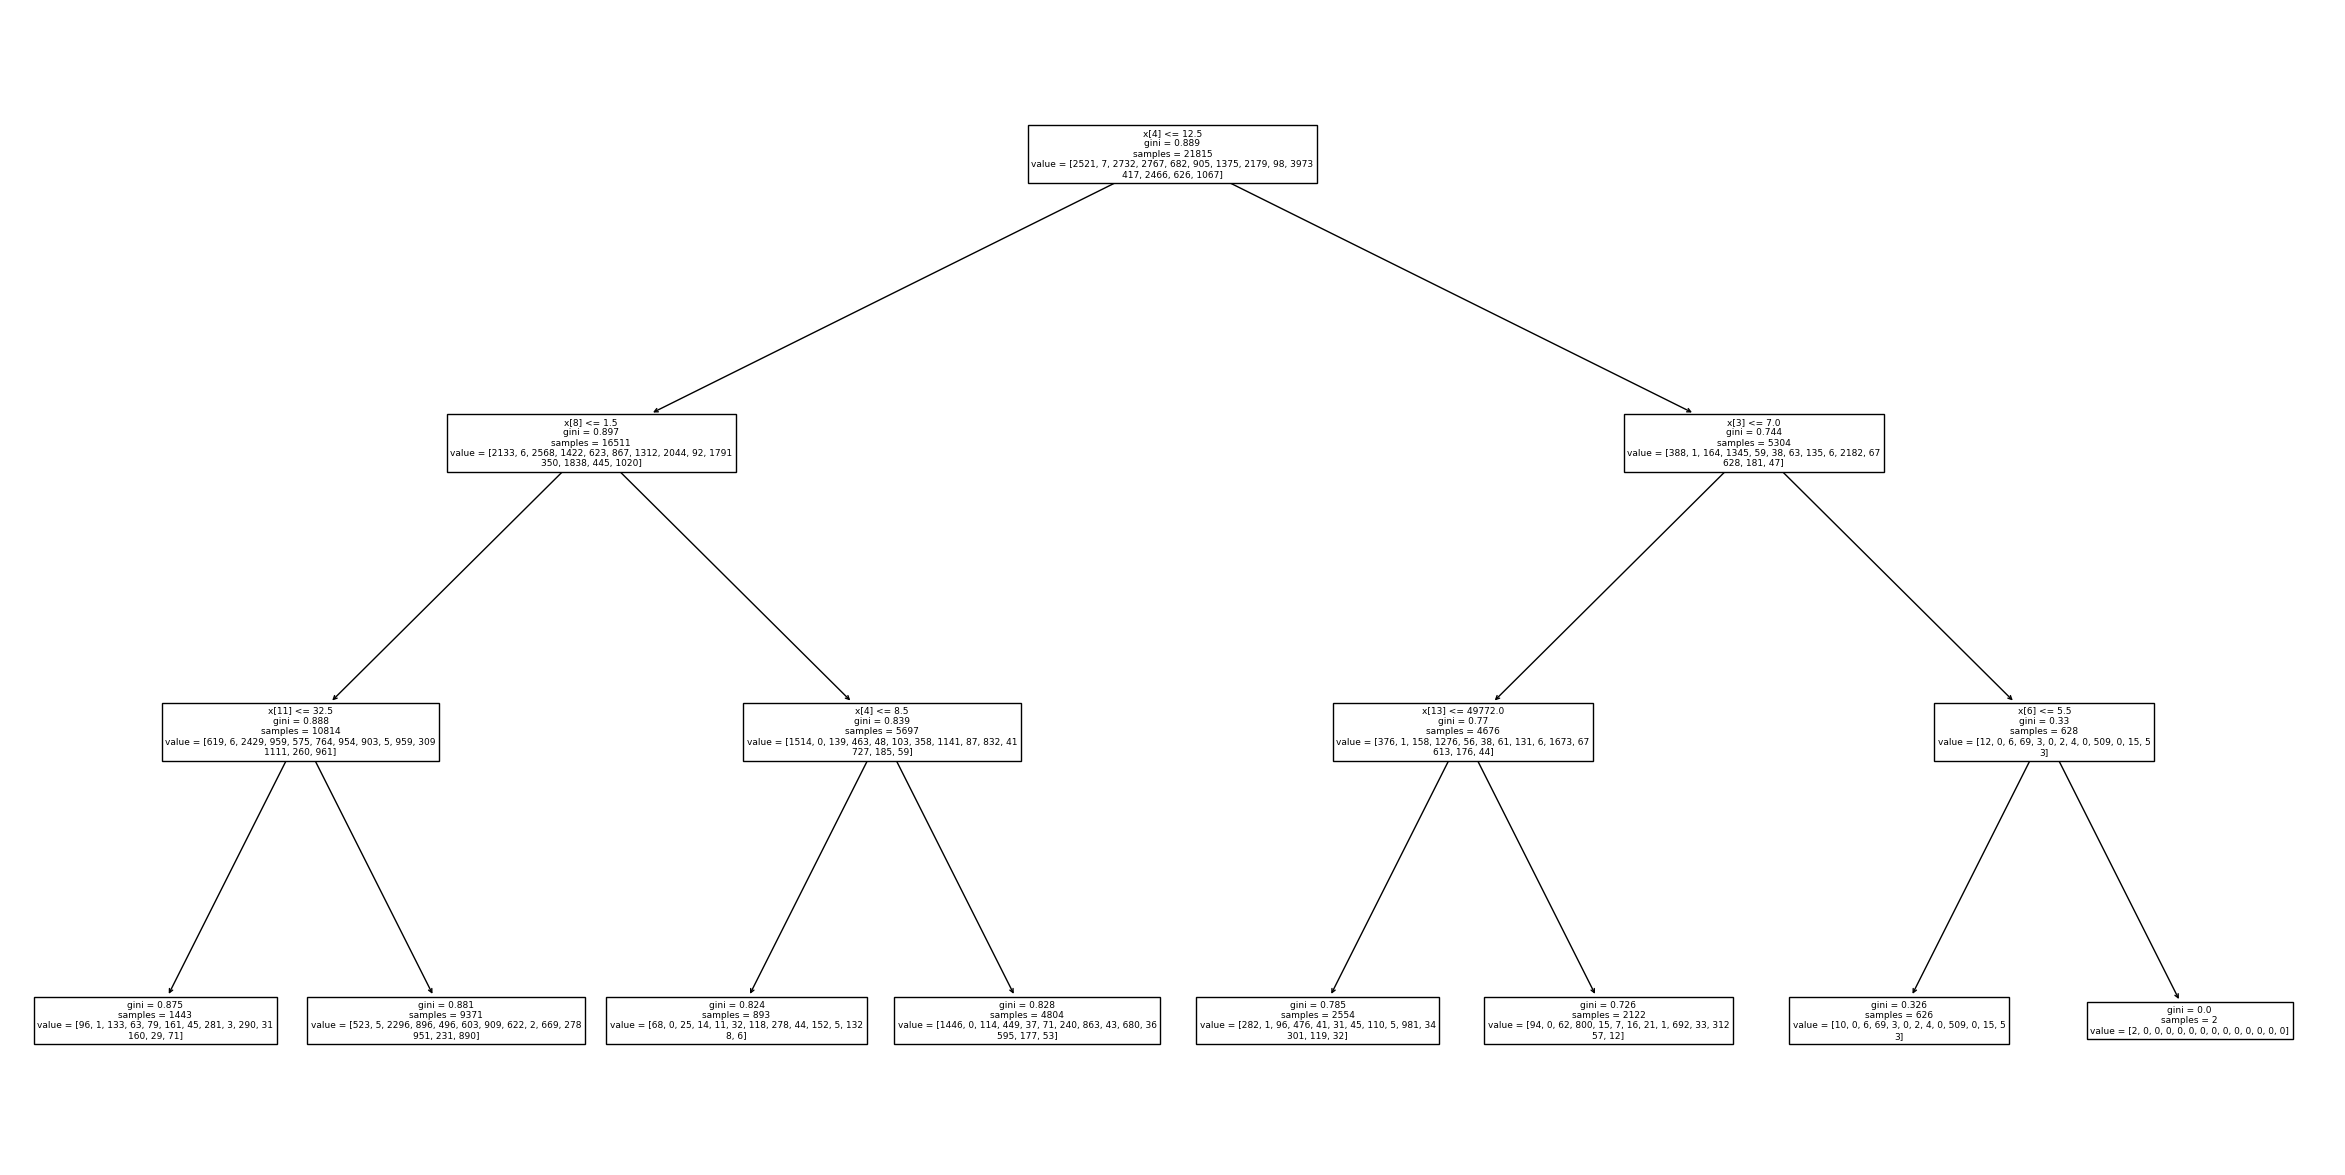

In [74]:
plt.figure(figsize=(30,15))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

<font size="5">Outlier Detection and Treatment:
Identify and handle outliers using techniques like z-scores, IQR, or domain knowledge. 

In [69]:
from scipy.stats import zscore


z_threshold = 3

z_scores = zscore(X_train)

df_z_scores = pd.DataFrame(z_scores, columns=X_train.columns)

outliers_z_scores = (df_z_scores > z_threshold) | (df_z_scores < -z_threshold)


In [71]:
print(X_train[outliers_z_scores.any(axis=1)])

       age  workclass  fnlwgt  education  education-num  marital-status  \
23672   47          3  191175          4              3               1   
31532   43          1  226902          1              9               1   
16319   46          1  190115          3             10               1   
25610   49          5  229737          9             15               1   
9547    47          6   53498          1              9               4   
...    ...        ...     ...        ...            ...             ...   
18431   37          1  118681          1              9               3   
29419   35          1  213208          6             11               1   
6420    30          1  177216          9             15               1   
23333   44          6  184099          1              9               1   
27495   19          1  243941          3             10               3   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
23672             1  

In [72]:
iqr_multiplier = 1.5

Q1 = X_train.select_dtypes(include='number').quantile(0.25)
Q3 = X_train.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (X_train.select_dtypes(include='number') < (Q1 - iqr_multiplier * IQR)) | (X_train.select_dtypes(include='number') > (Q3 + iqr_multiplier * IQR))

print(X_train[outliers_iqr.any(axis=1)])

       age  workclass  fnlwgt  education  education-num  marital-status  \
16068   44          1  124924          1              9               1   
18010   44          2  387770          3             10               2   
22472   32          1  111836          3             10               1   
11191   47          1  109832          1              9               1   
23245   62          1  138157          1              9               1   
...    ...        ...     ...        ...            ...             ...   
29802   35          1  109351          5             13               3   
5390    31          1  101562          1              9               1   
860     43          1  191547          1              9               1   
15795   21          1  223352          1              9               3   
23654   27          2  236472          5             13               4   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
16068             1  